# Wavefolding

Wavefolding is a special case of waveshaping, working with periodic transfer functions. Depending on the pre-gain, the source signal gets *folded* back, once a maximum of the transfer function is reached. Compared to the previously introduced soft clipping or other methods of waveshaping, this adds many strong harmonics.
  
## Periodic Shaping Function  
  
A simple basic transfer function is a sine with the appropriate scaling factor.
The pre-gain $g$ is the parameter for controling the intensity of the folding effect:


$$
y[n] = sin( g \frac{\pi}{2} x[n]) 
$$
 
 
For an input signal $x$, limited to values between $-1$ and $1$,
respectively for gains $g\leq1$,
this results in a sinusoidal waveshaping function with saturation:

Text(0,0.5,'y')

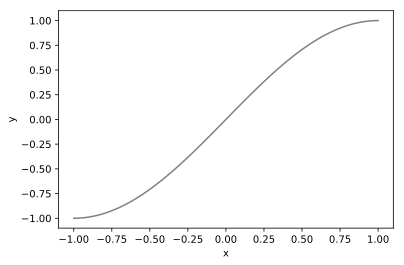

In [1]:

%run header.ipynb

x = np.linspace(-1,1,100);

plt.plot(x,np.sin(np.pi/2 * x),color = [0.5,0.5,0.5]);

plt.xlabel('x');
plt.ylabel('y');

When the input signal exceeds the boundaries $-1$ and $1$, the signal does not clip
but is folded back. This can be achieved by amplifying the input with an additional gain:


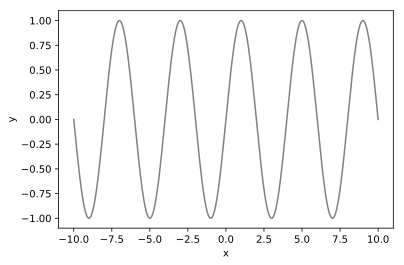

In [2]:

x = np.linspace(-10,10,1000);

plt.plot(x,np.sin(np.pi/2 * x),color = [0.5,0.5,0.5]);

plt.xlabel('x');
plt.ylabel('y');

For a gain of $g=3$, the time-domain output signal looks as follows:

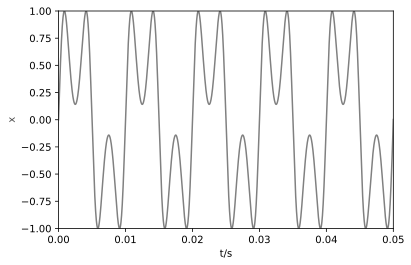

In [3]:
# define wavefolding function

def wavefolder(x, f, g):
    
    y = np.sin(x*g)
    
    return(y)

# basic parameters
fs = 48000
L  = 48000

t  = np.linspace(0,1,L)
f  = np.linspace(-0.5,0.5,L)


x    = np.sin(2*np.pi*100*t)
gain = 3

y    = wavefolder(x,0,gain)
 

fig1, ax1 = plt.subplots()
 

ax1.set_xlabel('t/s')
ax1.set_ylabel('x' ,color = [ 0.3, 0.3, 0.3])
ax1.set_xlim(0, 0.05) 
ax1.set_ylim(-1, 1) 


#ipd.display(ipd.Audio(y, rate=fs))
line, = ax1.plot(t,y,color = [0.5,0.5,0.5]);



# Spectrum for a Sinusoidal Input

The spectrum of wavefolding can be calculated by expressing the folding term as a Fourier series:
The [Jacobi–Anger expansion](https://en.wikipedia.org/wiki/Jacobi%E2%80%93Anger_expansion) can be used for this purpose, with the pre-gain $g$:

$$
\sin(g \sin(x)) = 2 \sum\limits_{m=1}^{\infty} J_{2m-1}(g)  \sin((2m-1)x)
$$

At this point it is already apparent that the resulting signal contains harmonics at 
odd integer multiples of the fundamental frequency $f_m = 100 \mathrm{Hz}\ (2 m -1)$.
Their gain is determined by first kind Bessel functions $J_{2m-1}(g)$:

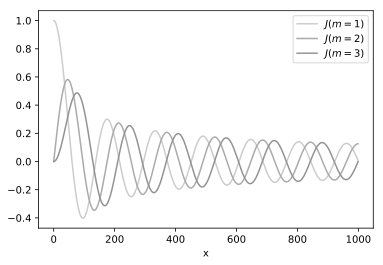

In [4]:
from scipy.special import jv

x = np.linspace(0,40,1000)

y = np.zeros(1000)

plt.figure()


for i in range(3):

    y = jv(i,x)

    plt.plot(y,color = np.array([4, 4, 4])/(i+5))

plt.xlabel('x');

plt.legend([
    '$J(m=1)$',
    '$J(m=2)$',
    '$J(m=3)$']);


For the DFT this leads to:


$$
\begin{eqnarray}
X[k] &=& 
2 \sum\limits_{m=1}^{\infty} J_{2m-1}(g)  \sin((2m-1)x)
\sum\limits_{n=0}^{N-1} e^{-j 2 \pi k \frac{n}{N}} \\
%
%
%
X[k]  &=& 
2 \sum\limits_{n=0}^{N-1}  \sum\limits_{m=1}^{\infty}
J_{2m-1}(g)  \sin((2m-1)x)\ 
e^{-j 2 \pi k \frac{n}{N}} \\
%
%
%
X[k]  &=& 
2 \sum\limits_{n=0}^{N-1}  \sum\limits_{m=1}^{\infty}
J_{2m-1}(g)  
\frac{1}{2} \left( e^{j (2m-1)x} - e^{-j(2m-1)x} \right)   % \sin((2n-1)x)\ 
e^{-j 2 \pi k \frac{n}{N}} \\
%
%
%
X[k]  &=&
\sum\limits_{n=0}^{N-1}  \sum\limits_{m=1}^{\infty}
J_{2m-1}(g)  
\left( e^{-j 2 \pi k \frac{n}{N} + j (2m-1)x } 
- e^{-j 2 \pi k \frac{n}{N} -j(2m-1)x} \right)   % \sin((2n-1)x)\ 
\end{eqnarray}
$$

With $x = 2 \pi \frac{f_0}{f_s} n$

$$
X[k] = \sum\limits_{n=0}^{N-1}  \sum\limits_{m=1}^{\infty}
J_{2m-1}(g)  
\left( e^{-j 2 \pi k \frac{n}{N} + j (2m-1) 2 \pi \frac{f_0}{f_s} } 
- e^{-j 2 \pi k \frac{n}{N} -j(2m-1) 2 \pi \frac{f_0}{f_s}} \right)   % \sin((2n-1)x)\ 
$$

[<sup id="fn1">1</sup>](#fn1-back) Hints on this by [Peyam Tabrizian](https://math.asu.edu/node/4743) can be found here: https://youtu.be/C641y-z3aI0 

# DFT Plots

The below plots show the spectra of the folding operation for a sine input of $100 \mathrm{Hz}$ at different gains. With increasing gain, partials are added at the odd integer multiples of the fundamental frequency
$f_m = 100 \mathrm{Hz}\ (2 m -1)$:

In [5]:
f_m=np.array([1, 2, 3, 4, 5, 6, 7,8,9,10])

print(100*(2*(f_m)-1),'...')

[ 100  300  500  700  900 1100 1300 1500 1700 1900] ...


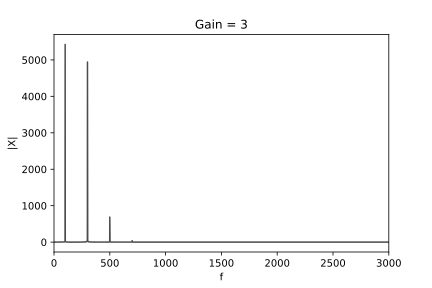

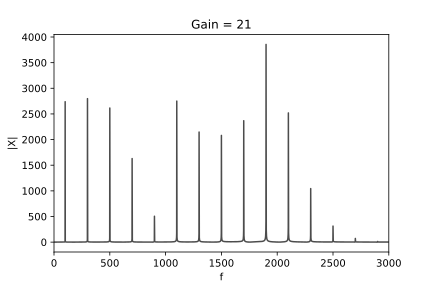

In [7]:

# define wavefolding function
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
def wavefolder(x, f, g):
    
    y = np.sin(x*g)
    
    return(y)

# basic parameters
fs = 16000
L  = fs

t  = np.linspace(0,1,L)
f  = np.linspace(0,fs,L)

f0   = 100
x    = np.sin(2*np.pi*f0*(t))
gain = 3

y    = wavefolder(x,0,gain)
 

fig1, ax1 = plt.subplots()
 
plt.title("Gain = 3")

Y     = (np.fft.fft(y))
line, = ax1.plot(f,abs(Y) ,color = [ 0.3, 0.3, 0.3]);

ax1.set_xlabel('f')
ax1.set_ylabel('|X|')
ax1.set_xlim(0,3000);



gain = 21

y    = wavefolder(x,0,gain)

fig2, ax2 = plt.subplots()
 
plt.title("Gain = 21")

Y     = (np.fft.fft(y))
line, = ax2.plot(f,abs(Y) ,color = [ 0.3, 0.3, 0.3]);

ax2.set_xlabel('f')
ax2.set_ylabel('|X|')
ax2.set_xlim(0,3000);

 
